# MACHINE LEARNING MODELLING
## Supervised Learning

#### Import Packages

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Import Data

In [230]:
df = pd.read_csv('MelbourneCleanInterpolate.csv', parse_dates=['Date'])

In [231]:
pd.options.display.max_columns = 999
df = df.loc[df['Method']!='PI'] # Subset rows yang Method != 'PI' atau Passed In karena ini menandakan properti tidak terjual

In [232]:
df.reset_index(inplace=True, drop=True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,140.0,1950.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
4,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,95.0,1950.0,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0


In [5]:
df.shape

(23833, 20)

In [6]:
# Data Summary
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

# Berdasarkan data dibawah, tampak data sudah bersih, tidak Null/Nan Values terdeteksi

,Features,D types,Null,Null%,Unique,Unique Value
0,Suburb,object,0,0.0,336,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,0.0,23507,"[85 Turner St, 25 Bloomburg St, 5 Charles St, ..."
2,Rooms,int64,0,0.0,12,"[2, 3, 4, 1, 5, 6, 8, 7, 10, 9, 16, 12]"
3,Type,object,0,0.0,3,"[h, t, u]"
4,Price,float64,0,0.0,2826,"[1480000.0, 1035000.0, 1465000.0, 1600000.0, 9..."
5,Method,object,0,0.0,4,"[S, SP, VB, SA]"
6,SellerG,object,0,0.0,327,"[Biggin, Nelson, Jellis, Dingle, Purplebricks,..."
7,Date,datetime64[ns],0,0.0,78,"[2016-03-12T00:00:00.000000000, 2016-04-02T00:..."
8,Distance,float64,0,0.0,212,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,0,0.0,207,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


## Data Preparation

### Feature Selection

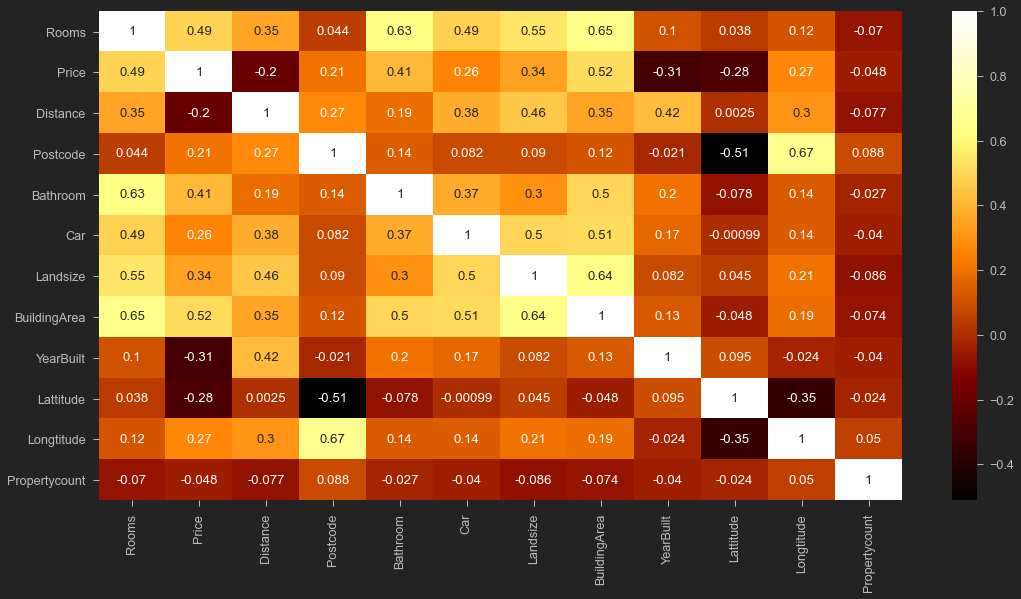

In [7]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr('spearman'), annot=True, cmap='afmhot');

In [8]:
# Menghitung Correlation Ratio kolom target (numerik) dengan kolom kategorikal

def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

# Mengambil colom dengan tipe object

cat_col = df.select_dtypes(include=['object']).columns
for i in cat_col:
    print(f"{i}\t: {correlation_ratio(df[i], df['Price'])}")

# Melihat asosiasi kolom kategorikal dengan kolom target price (numerikal)

Suburb	: 0.5756133837015556
Address	: 0.9965193659474788
Type	: 0.3637538195908584
Method	: 0.1290976457590595
SellerG	: 0.4912736222780625
CouncilArea	: 0.4873132436389101
Regionname	: 0.3872661682950479


Berdasarkan hasil korelasi spearman karena distribusi data tidak normal, dapat dilihat bahwa Rooms, Bathroom, Car, Landsize dan Building Area memiliki korelasi positif sedangkan Distance dan Yearbuilt memiliki korelasi negatif.  

Dari Correlation Ratio antara kolom target (price) dengan kolom kategorikal, Suburb dan SellerG dan Council Area menunjukkan asosiasi yang cukup tinggi.  
#### Initial Hypothesis
Kolom Numerikal yang akan digunakan adalah Rooms, Distance, Bathroom, Landsize, BuildingArea  
Kolom Kategorikal yang akan digunakan adalah Suburb, SellerG dan Council Area

### Feature Engineering

In [233]:
# Adding Feature

df['Year'] = df['Date'].dt.year
df['age'] = df['Year'] - df['YearBuilt']

In [234]:
# Binning Age house

bin_Age = [-3, 0, 10, 20, 40, 60,80,120,140,df['age'].max()]
label_age = ['below 1 year','below 10 years', 'below 20 years', 'below 40 years', 'below 60 years','below 80 years', 'below 120 years', 'below 140 years', 'above 140 years']
df['age_group'] = pd.cut(df['age'], bins = bin_Age, labels = label_age)

In [11]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,age,age_group
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,140.0,1950.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,66.0,below 80 years
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,116.0,below 120 years
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,117.0,below 120 years
3,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,2.0,below 10 years
4,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,95.0,1950.0,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0,2016,66.0,below 80 years


In [235]:
# Drop Unnecessary Columns

df1 = df.drop(columns=['Address','Method','Date','Car','YearBuilt','Year','Lattitude','Longtitude','Postcode','Propertycount','age_group','Regionname','age','SellerG','CouncilArea'], axis=1)
df1.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Landsize,BuildingArea
0,Abbotsford,2,h,1480000.0,2.5,1.0,202.0,140.0
1,Abbotsford,2,h,1035000.0,2.5,1.0,156.0,79.0
2,Abbotsford,3,h,1465000.0,2.5,2.0,134.0,150.0
3,Abbotsford,4,h,1600000.0,2.5,1.0,120.0,142.0
4,Abbotsford,2,h,941000.0,2.5,1.0,181.0,95.0


#### One Hot Encoding

In [236]:
df1 = pd.get_dummies(df1, columns=['Suburb','Type'])

#### Label Encoding

In [237]:
df1.head()

,Rooms,Price,Distance,Bathroom,Landsize,BuildingArea,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Pon

### Train Test Split

In [238]:
X = df1.drop(columns=['Price']) ### Features / Soal
y = df1['Price']
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

In [212]:
# coba = y[0]
# coba = np.log(coba)
# coba = np.exp(coba)
# coba

In [239]:
X_train

,Rooms,Distance,Bathroom,Landsize,BuildingArea,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Sub

In [198]:
y_train

6735     13.444447
19163    13.800397
10834    14.173185
5773     13.345507
21962    13.081541
           ...    
18898    14.046622
11798    13.415033
6637     13.461689
2575     12.736701
23720    13.399995
Name: Price, Length: 19066, dtype: float64

In [199]:
X_test

,Rooms,Distance,Bathroom,Landsize,BuildingArea,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Sub

In [18]:
y

0        14.207553
1        13.849912
2        14.197366
3        14.285514
4        13.754698
           ...    
23828    13.253392
23829    13.911729
23830    13.696727
23831    13.465953
23832    13.946539
Name: Price, Length: 23833, dtype: float64

## MODELLING
### Base Model
#### Support Vector Machine

In [19]:
from sklearn.svm import SVR

In [20]:
model = SVR()
model.fit(X_train, y_train)
y_pred_SVM = model.predict(X_test)

In [21]:
MAE_SVM = mean_absolute_error(y_test, y_pred_SVM)
MSE_SVM = mean_squared_error(y_test, y_pred_SVM)
RMSE_SVM = np.sqrt(MSE_SVM)
R2_SVM = r2_score(y_test, y_pred_SVM)
print(f"Training: {model.score(X_train, y_train)}")
print(f'Testing: {R2_SVM}')
print(f'MAE: {MAE_SVM}')
print(f'RMSE: {RMSE_SVM}')

Training: 0.29358390977206816
Testing: 0.30014512350719325
MAE: 0.3368733105774134
RMSE: 0.4269621074307069


### Optimized Model
#### Scalling

In [22]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [23]:
Scale = RobustScaler()
X_train_scaled = Scale.fit_transform(X_train)
X_test_scaled = Scale.fit_transform(X_test)
X_train_scaled

array([[ 0.        ,  0.38461538,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.52564103,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.42307692,  1.        , ..., -1.        ,
         1.        ,  0.        ],
       ...,
       [-0.5       ,  0.26923077,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.35897436,  0.        , ..., -1.        ,
         0.        ,  1.        ],
       [ 0.5       ,  1.29487179,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
model = SVR()
model.fit(X_train_scaled, y_train)
y_pred_SVM_scaled = model.predict(X_test_scaled)

In [25]:
MAE_SVM_scaled = mean_absolute_error(y_test, y_pred_SVM_scaled)
MSE_SVM_scaled = mean_squared_error(y_test, y_pred_SVM_scaled)
RMSE_SVM_scaled = np.sqrt(MSE_SVM_scaled)
R2_SVM_scaled = r2_score(y_test, y_pred_SVM_scaled)
print(f'MAE: {MAE_SVM_scaled}')
print(f'RMSE: {RMSE_SVM_scaled}')
print(f"R2 Train: {model.score(X_train_scaled, y_train)}")
print(f'R2 Test: {R2_SVM_scaled}')

MAE: 0.15921356302930736
RMSE: 0.21340845958432053
R2 Train: 0.8384901231630143
R2 Test: 0.8251552533044574


### Random Forest

In [26]:
df_rf = df.drop(columns=['Address','Method','Date','Car','YearBuilt','Year','Lattitude','Longtitude','Postcode','Propertycount','age_group','Regionname','age','SellerG','CouncilArea'], axis=1)
df_rf = pd.get_dummies(df_rf, columns=['Type','Suburb'])

In [27]:
X_rf = df_rf.drop(columns=['Price']) ### Features / Soal
y_rf = df_rf['Price']
y_rf = np.log(y_rf)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size = .2, random_state = 2)

In [28]:
%%time
model_random = RandomForestRegressor()
model_random.fit(X_train,y_train)
pred_RF= model_random.predict(X_test)
R2_RF = r2_score(y_test, pred_RF)
print(f"Training: {model_random.score(X_train,y_train)}")
print(f"Testing: {R2_RF}")
MAE_base_RF = mean_absolute_error(y_test, pred_RF)
MSE_base_RF = mean_squared_error(y_test, pred_RF)
RMSE_base_RF = np.sqrt(MSE_base_RF)

Training: 0.9640762936630072
Testing: 0.831360258952442
Wall time: 1min 14s


In [29]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': pred_RF})
RFdata.head(10)

,Actual,Prediction
12462,13.246349,13.134265
10586,14.014361,14.099175
12608,12.971540,13.028226
18527,12.517227,12.985555
21531,13.384728,13.323220
18839,13.568330,13.561617
18547,13.384728,13.329047
13983,13.745088,13.577773
6225,14.703402,14.250866
11759,13.541074,13.736603


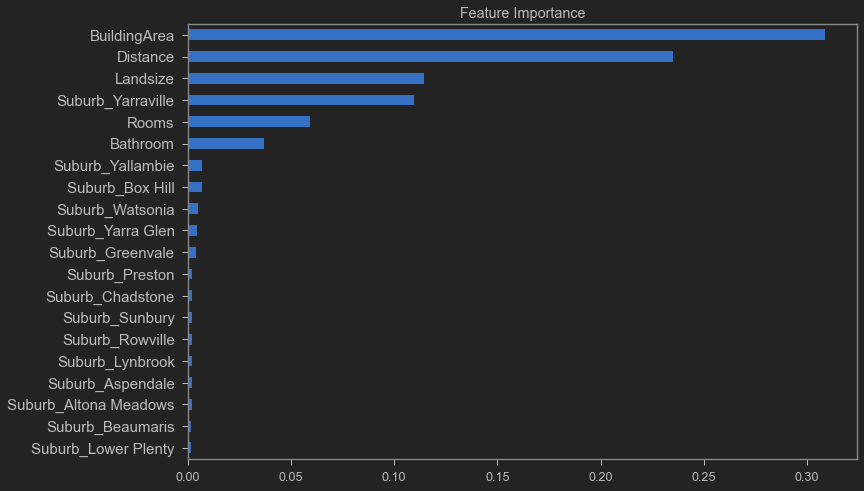

In [30]:
plt.figure(figsize=(12,8))
plt.yticks(size=15)

feat_imp = pd.Series(model_random.feature_importances_, X_rf.columns).sort_values(ascending = True).tail(20)
feat_imp.plot(kind = 'barh', title = 'Feature Importance');

### XGBoost Regressor

In [31]:
import xgboost as xgb
from xgboost import XGBRegressor

In [32]:
%%time
modelXGB = XGBRegressor()
modelXGB.fit(X_train,y_train)
y_XGB = modelXGB.predict(X_test)

Wall time: 2min 20s


In [214]:
%%time
r2_base_XGB = r2_score(y_test, y_XGB)
print(f"Training: {modelXGB.score(X_train, y_train)}")
print(f"Testing: {r2_base_XGB}")
MAE_Base_XGB = mean_absolute_error(y_test, y_XGB)
MSE_Base_XGB = mean_squared_error(y_test, y_XGB)
RMSE_Base_XGB = np.sqrt(MSE_Base_XGB)


Training: 0.8730218345597079
Testing: 0.8326845019162804
Wall time: 311 ms


## Hyper Parameter Tuning

### SVM Hyper Paramater Tuning

In [34]:
SVM_tuned = SVR()
param_SVM = {
             'C': [3]
             
           }

In [35]:
model_SVM_Tuned = GridSearchCV(estimator=SVM_tuned, param_grid=param_SVM, cv=4,n_jobs=-1, verbose=1)
model_SVM_Tuned.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.9min finished


GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1, param_grid={'C': [3]}, verbose=1)

In [36]:
model_SVM_Tuned.best_params_

{'C': 3}

In [37]:
SVM_tuned = model_SVM_Tuned.best_estimator_
y_tunedSVM = SVM_tuned.predict(X_test_scaled)

In [38]:
r2_tune_SVM = r2_score(y_test, y_tunedSVM)
MAE_tune_SVM = mean_absolute_error(y_test, y_tunedSVM)
MSE_tune_SVM = mean_squared_error(y_test, y_tunedSVM)
RMSE_tune_SVM = np.sqrt(MSE_tune_SVM)

In [49]:
print(f"R2 Train: {SVM_tuned.score(X_train_scaled, y_train)}")
print(f"R2 Test: {r2_tune_SVM}")
r2_tune_svm_train = SVM_tuned.score(X_train_scaled, y_train)

R2 Train: 0.8547246784109809
R2 Test: 0.8384329306020654


In [271]:
SVM_data = pd.DataFrame({'Actual':np.exp(y_test)/1000, 'Prediction': np.exp(y_tunedSVM)/1000})
SVM_data.sample(10) 

,Actual,Prediction
2448,1687.0,1579.480433
16090,1100.0,1087.252242
16527,560.0,494.490752
3056,1220.0,1170.389760
17913,1750.0,1675.489347
6616,850.0,715.078889
8384,530.0,533.255548
15546,567.5,555.953004
4292,523.0,589.670621
22251,1000.0,1145.229295


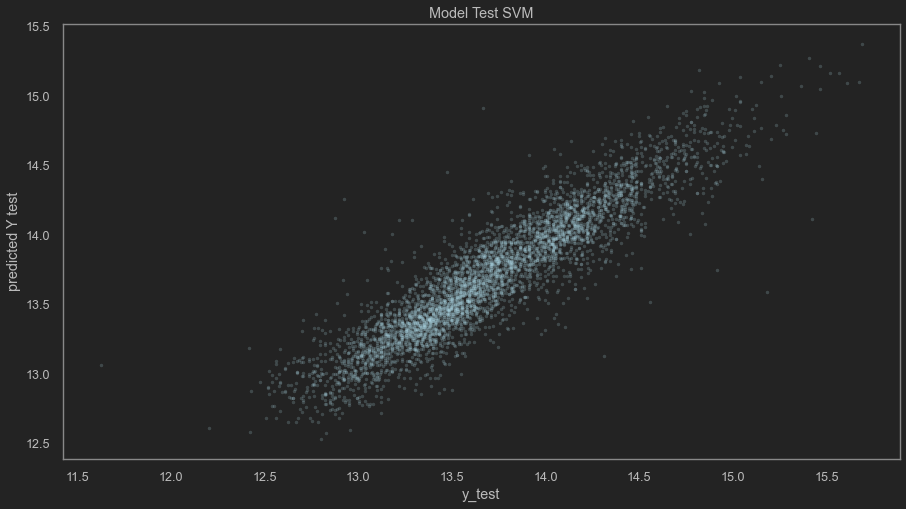

In [284]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_tunedSVM,s=10, alpha=0.2, color='lightblue') 
plt.title('Model Test SVM')
plt.xlabel('y_test')
plt.ylabel('predicted Y test')
plt.show()

### Random Forest Hyper Parameter Tuning

In [40]:
coba = [int(x) for x in np.linspace(start = 1000, stop = 12000, num = 12)]
coba

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

In [59]:
RF_tuned = RandomForestRegressor()
param_RF = {'n_estimators': [1000,2000,3000],
            'max_depth': [None,5,8,10],
            'min_samples_split': [2,10,20],
            'max_features': ['auto',5,10]
           }

In [62]:
model_RF_Tuned = GridSearchCV(estimator=RF_tuned, param_grid=param_RF,cv=5 ,n_jobs=-1, verbose=1)
model_RF_Tuned.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 77.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 197.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 321.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 349.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 8, 10],
                         'max_features': ['auto', 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [1000, 2000, 3000]},
             verbose=1)

In [63]:
model_RF_Tuned.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [226]:
RF_tuned2 = RandomForestRegressor()
param_RF2 = {'max_depth': [None],
             'max_features': [5],
             'min_samples_split': [2],
             'n_estimators': [2000]}

In [227]:
model_RF_Tuned2 = GridSearchCV(estimator=RF_tuned2, param_grid=param_RF2,cv=5 ,n_jobs=-1, verbose=1)
model_RF_Tuned2.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [5],
                         'min_samples_split': [2], 'n_estimators': [2000]},
             verbose=1)

In [241]:
RF_tuned2 = model_RF_Tuned2.best_estimator_
y_tunedRF = RF_tuned2.predict(X_test)

In [242]:
r2_tune_RF = r2_score(y_test, y_tunedRF)
MAE_tune_RF = mean_absolute_error(y_test, y_tunedRF)
MSE_tune_RF = mean_squared_error(y_test, y_tunedRF)
RMSE_tune_RF = np.sqrt(MSE_tune_RF)

In [243]:
print(f"Training: {RF_tuned2.score(X_train, y_train)}")
print(f"Testing: {r2_tune_RF}")
# r2_tune_RF_train = RF_tuned.score(X_train, y_train)

Training: 0.9680444750801915
Testing: 0.8461933783534652


In [67]:
RFdata = pd.DataFrame({'Actual':np.exp(y_test)/1000, 'Prediction': np.exp(y_tunedRF)/1000})
RFdata.head(10) 

,Actual,Prediction
12462,566.0,583.132472
10586,1220.0,1311.641716
12608,430.0,481.898728
18527,273.0,458.496521
21531,650.0,694.364779
18839,781.0,830.787690
18547,650.0,615.586154
13983,932.0,749.380041
6225,2430.0,1739.548382
11759,760.0,979.454338


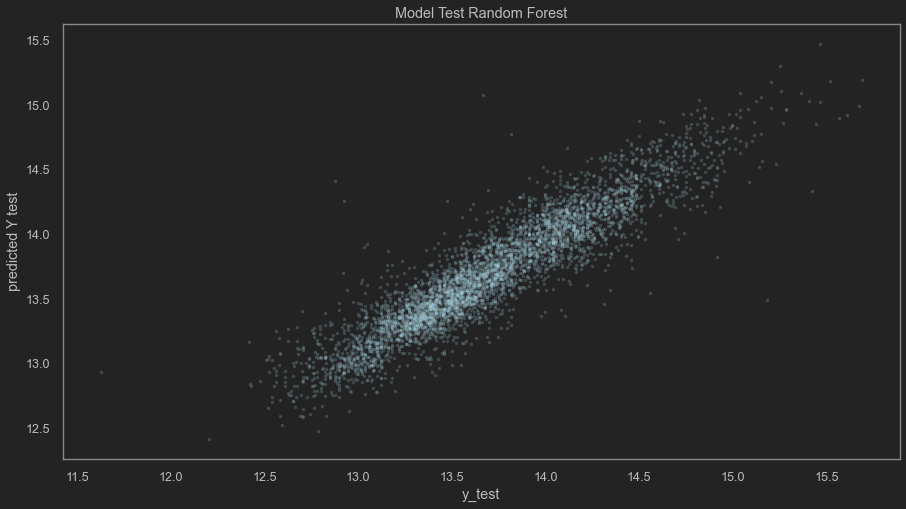

In [99]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_tunedRF,s=10, alpha=0.2, color='lightblue') 
plt.title('Model Test Random Forest')
plt.xlabel('y_test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

### XGBoost Hyper Parameter Tuning

In [88]:
XGB_Tuned = XGBRegressor()
param_xgb = {'max_depth': [None, 1, 10],
             'learning_rate': [0.300000012,0.600000012] , 
             'n_estimators': [1000,2000], 
             'gamma': [0,.5,1], 
             'colsample_bytree': [1,0.5],
             'subsample': [1,0.5], 
             'reg_alpha':[0,0.5,0.8] ,
             'reg_lambda': [1,0.8,1.2],
            }

In [89]:
model_Tuned_XGB = RandomizedSearchCV(XGB_Tuned, param_distributions=param_xgb, cv= 5, n_jobs= -1, verbose= 1)
model_Tuned_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 63.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [90]:
model_Tuned_XGB.best_params_

{'subsample': 0.5,
 'reg_lambda': 1.2,
 'reg_alpha': 0.5,
 'n_estimators': 2000,
 'max_depth': 10,
 'learning_rate': 0.300000012,
 'gamma': 0,
 'colsample_bytree': 1}

In [91]:
model_tuned_XGB = model_Tuned_XGB.best_estimator_
y_tuned_xgb = model_tuned_XGB.predict(X_test)
r2_tune_XGB = r2_score(y_test, y_tuned_xgb)
print(f"Training: {modelXGB.score(X_train, y_train)}")
print(f"Testing: {r2_base_XGB}")
MAE_Tuned_XGB = mean_absolute_error(y_test, y_tuned_xgb)
MSE_Tuned_XGB = mean_squared_error(y_test, y_tuned_xgb)
RMSE_Tuned_XGB = np.sqrt(MSE_Tuned_XGB)


Training: 0.8730218345597079
Testing: 0.8326845019162804


In [92]:
XGBdata = pd.DataFrame({'Actual':np.exp(y_test)/1000, 'Prediction': np.exp(y_tuned_xgb)/1000})
XGBdata.head(10) 

,Actual,Prediction
12462,566.0,419.307434
10586,1220.0,1225.321655
12608,430.0,400.511383
18527,273.0,375.337830
21531,650.0,611.203308
18839,781.0,826.432190
18547,650.0,681.287598
13983,932.0,804.179688
6225,2430.0,1682.009521
11759,760.0,1005.294617


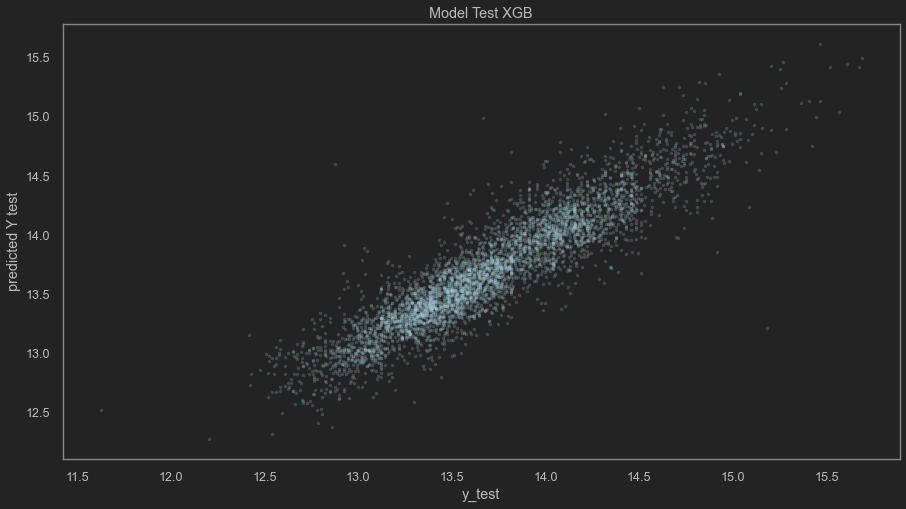

In [98]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_tuned_xgb,s=10, alpha=0.2,color='lightblue') 
plt.title('Model Test XGB')
plt.xlabel('y_test')
plt.ylabel('predicted Y test')
plt.show()

### Evaluation Metrics

In [97]:
datas = {
    'Base SVM': [MAE_SVM_scaled,MSE_SVM_scaled,RMSE_SVM_scaled,R2_SVM_scaled],
    'Base RF' : [MAE_base_RF,MSE_base_RF,RMSE_base_RF,R2_RF],
    'Base XGB': [MAE_Base_XGB,MSE_Base_XGB,RMSE_Base_XGB,r2_base_XGB],
    'SVM Tuned': [MAE_tune_SVM,MSE_tune_SVM,RMSE_tune_SVM,r2_tune_SVM], 
    'RF Tuned': [MAE_tune_RF,MSE_tune_RF,RMSE_tune_RF,r2_tune_RF],
    'XGB Tuned': [MAE_Tuned_XGB,MSE_Tuned_XGB,RMSE_Tuned_XGB,r2_tune_XGB],
}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2
RF Tuned,0.147695,0.040030,0.200074,0.846322
SVM Tuned,0.151600,0.042085,0.205145,0.838433
XGB Tuned,0.155412,0.043089,0.207579,0.834576
Base XGB,0.157556,0.043582,0.208763,0.832685
Base RF,0.154578,0.043927,0.209587,0.831360
Base SVM,0.159214,0.045543,0.213408,0.825155


# Conclusion
Model Machine Learning terbaik untuk memprediksi Harga Properti di Melbourne adalah Random Forest yang sudah melalui proses Hyper Parameter Tuning dengan tingkat akurasi 85% dan dengan tingkat error yang paling kecil dibanding model machine learning lainnya

### PIPELINE BEST MODEL

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [398]:
df2 = df.drop(columns=['Address','Method','Date','Car','YearBuilt','Year','Lattitude','Longtitude','Postcode','Propertycount','age_group','Regionname','age','SellerG','CouncilArea'], axis=1)
df2.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Landsize,BuildingArea
0,Abbotsford,2,h,1480000.0,2.5,1.0,202.0,140.0
1,Abbotsford,2,h,1035000.0,2.5,1.0,156.0,79.0
2,Abbotsford,3,h,1465000.0,2.5,2.0,134.0,150.0
3,Abbotsford,4,h,1600000.0,2.5,1.0,120.0,142.0
4,Abbotsford,2,h,941000.0,2.5,1.0,181.0,95.0


In [373]:
df2['Suburb'].value_counts()
tes = df2.groupby('Suburb')[['Suburb']].count()
mask = tes.loc[tes['Suburb']<3].index
for i in mask:
    print(i)
    df2.drop(df2.loc[df2['Suburb']==i].index, inplace=True)

Beaconsfield
Beaconsfield Upper
Gisborne South
Healesville
Hurstbridge
Silvan
Upwey
Warranwood
Wonga Park


In [374]:
df2.reset_index(inplace=True,drop=True)

In [399]:
X_pipe = df2.drop(columns=['Price']) ### Features / Soal
y_pipe = df2['Price']
y_pipe = np.log(y_pipe)
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X_pipe, y_pipe, test_size = .2, random_state = 2, )

In [400]:
X_train_pipe

,Suburb,Rooms,Type,Distance,Bathroom,Landsize,BuildingArea
6735,Sunshine West,3,h,13.5,1.0,540.0,121.0
19163,Lower Plenty,3,h,14.6,1.0,594.0,134.0
10834,Bentleigh East,4,t,13.8,2.0,308.0,140.0
5773,Reservoir,3,h,11.2,1.0,493.0,135.0
21962,Reservoir,2,t,12.0,1.0,111.0,84.0
...,...,...,...,...,...,...,...
18898,Bentleigh East,5,h,13.8,2.0,604.0,168.5
11798,Cranbourne North,4,h,34.7,2.0,612.0,156.0
6637,Sunshine,2,h,12.6,1.0,611.0,153.0
2575,Elwood,1,u,7.7,1.0,84.5,42.0


In [401]:
cat_columns = ['Type','Suburb']

num_columns = ['Rooms', 'Distance', 'Bathroom','Landsize','BuildingArea']

In [402]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [403]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['Rooms', 'Distance', 'Bathroom', 'Landsize',
                                     'BuildingArea']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Type', 'Suburb'])])),
  ('algo', RandomForestRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['Rooms', 'Distance', 'Bathroom', 'Landsize',
                                   'BuildingArea']),
                                 ('categoric',
                                  Pipeline(steps=[('encoder',

In [404]:
param_RF_pipe = {'algo__max_depth': [None],
                 'algo__max_features': [5],
                 'algo__min_samples_split': [2],
                 'algo__n_estimators': [2000]}

In [405]:
model_RF_pipe = GridSearchCV(estimator=pipe_RF, param_grid=param_RF_pipe, cv=5, n_jobs=-1, verbose=1)

In [406]:
model_RF_pipe.fit(X_train_pipe, y_train_pipe)
model_RF_pipe_tuned = model_RF_pipe.best_estimator_
y_pred = model_RF_pipe_tuned.predict(X_test_pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.8min finished


In [407]:
r2_tune_RF_pipe = r2_score(y_test_pipe, y_pred)
MAE_tune_RF_pipe = mean_absolute_error(y_test_pipe, y_pred)
MSE_tune_RF_pipe = mean_squared_error(y_test_pipe, y_pred)
RMSE_tune_RF_pipe = np.sqrt(MSE_tune_RF_pipe)
print(f"R2 Train: {model_RF_pipe_tuned.score(X_train_pipe, y_train_pipe)}")
print(f"R2 Score: {r2_tune_RF_pipe}\nMAE: {MAE_tune_RF_pipe}\nMSE: {MSE_tune_RF_pipe}\nRMSE: {RMSE_tune_RF_pipe}")

R2 Train: 0.9680457304638329
R2 Score: 0.8463660738473947
MAE: 0.14769507017576097
MSE: 0.04001822327726628
RMSE: 0.2000455530054749


## DEPLOY MODEL

In [384]:
import joblib

In [415]:
joblib.dump(pipe_RF,'MelbourneModel')

['MelbourneModel']

### Test New Data

In [408]:
data_baru = [{
    'Rooms': 2,
    'Distance': 2.5,
    'Bathroom': 1,
    'Landsize': 200,
    'BuildingArea': 150,
    'Suburb': 'Abbotsford',
    'Type' : 'h',
}]

In [409]:
data_baru

[{'Rooms': 2,
  'Distance': 2.5,
  'Bathroom': 1,
  'Landsize': 200,
  'BuildingArea': 150,
  'Suburb': 'Abbotsford',
  'Type': 'h'}]

In [410]:
percobaan_1 = pd.DataFrame(data_baru, index=[1])
percobaan_1

,Rooms,Distance,Bathroom,Landsize,BuildingArea,Suburb,Type
1,2,2.5,1,200,150,Abbotsford,h


In [411]:
pipe_RF.fit(X_train_pipe, y_train_pipe)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rooms', 'Distance',
                                                   'Bathroom', 'Landsize',
                                                   'BuildingArea']),
                                                 ('categoric',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Suburb'])])),
                ('algo', RandomForestRegressor())])

In [412]:
pipe_rf = pipe_RF.predict(X_test_pipe)

In [413]:
pipeRF_data = pd.DataFrame({'Actual':y_test_pipe, 'Prediction': pipe_rf})
pipeRF_data.sample(10) 

,Actual,Prediction
9537,13.482831,13.533384
21805,13.235692,13.366515
14109,13.989464,14.043310
16051,12.765688,13.137039
5172,13.491165,13.560950
14225,14.488455,14.624823
50,13.309672,13.136687
5356,13.066851,13.434012
20081,15.520259,15.346927
22668,12.549662,12.831007


In [414]:
hasil = pipe_RF.predict(percobaan_1)[0]
hasil = np.exp(hasil)
hasil

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


1372349.7252845

In [270]:
# df2.to_csv('MelbourneRecommendation.csv', index=False)

In [395]:
suburb = 'Abbotsford'
Distance = 0
if suburb in list(df['Suburb'].unique()):
    Distance = df.loc[df['Suburb']==suburb,'Distance'].median()
print(Distance)

2.5
